In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observations = 1000 # N

# number of variables: k, x = k1, z = 
# vertical matrices
xs = np.random.uniform(-10, 10, size = (observations, 1)) #x: var 1
zs = np.random.uniform(-10, 10, (observations,1)) #z: var 2
                       
inputs = np.column_stack((xs, zs)) # stack into a matrix: n x k
inputs.shape

(1000, 2)

In [3]:
xs.shape
zs.shape

(1000, 1)

In [4]:
noise = np.random.uniform(-1, 1, (observations, 1)) # same shape as xs, zs
targets = 2*xs-3*zs + 5 + noise
targets.shape # y: desired targets

(1000, 1)

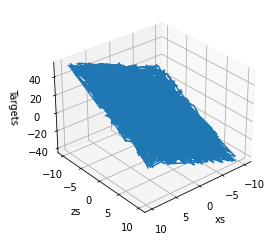

In [5]:
# to plot you need to reshape
targets_plt = targets.reshape(observations,)
xs_plt = xs.reshape(observations,)
zs_plt = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs_plt, zs_plt, targets_plt)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=50)
plt.show()


In [6]:
init_range = 0.1

In [7]:
# size: k x M, M is number of output
weights = np.random.uniform(-init_range, init_range, size=(2,1)) 

# size: M x M
biases = np.random.uniform(-init_range, init_range, size=(1,1)) 
biases.shape
print(weights.shape)

(2, 1)


In [8]:
learning_rate = 0.02 # eta: play around

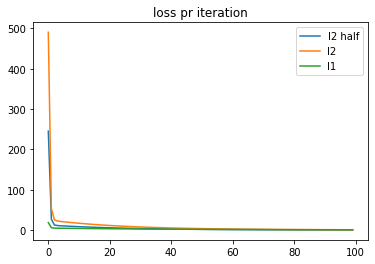

In [9]:
# train model: minize loss function
losses = []
losses_l2 = []
losses_l1 = []
for i in range(100):
    #1 calculates output for given weights and biases
    outputs = np.dot(inputs, weights) + biases # 1000x2 dot 2x1 + 1x1
    deltas = outputs-targets
    
    #2 calculates the loss function that compares output with targets
    loss = np.sum(deltas**2) / 2 / observations #half the L2-norm loss
    loss_l2 = np.sum(deltas**2) / observations #L2-norm loss'
    loss_l1 = np.sum(np.abs(deltas)) / observations #L2-norm loss
    losses.append(loss)
    losses_l2.append(loss_l2)
    losses_l1.append(loss_l1)
    #print(loss)
    
    #3 print the loss for analysis
    deltas_scaled = deltas/observations
    
    #4 updates the weights and biased following the gradient descent methodology 
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
losses

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(losses, label='l2 half')
ax.plot(losses_l2, label='l2')
ax.plot(losses_l1, label='l1')
ax.set_title('loss pr iteration')
ax.legend()
plt.show()

Text(0, 0.5, 'targets')

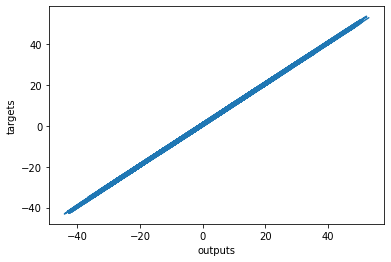

In [10]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')

In [11]:
(weights, biases)

(array([[ 2.00553077],
        [-2.9982884 ]]),
 array([[4.33881972]]))